<a href="https://colab.research.google.com/github/juandiego2205/Biosenales/blob/main/P6/Practica6_KevinGarcia_JuanCaguasango.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importación Librerias**

In [ ]:
# importación de librerías
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from google.colab import drive
import os
import pandas as pd
from scipy.signal import welch
drive.mount('/content/drive')
os.listdir('/content/drive/MyDrive/P6/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['senal_filtros.txt']

#**4.1 Creacion Señal de Prueba**

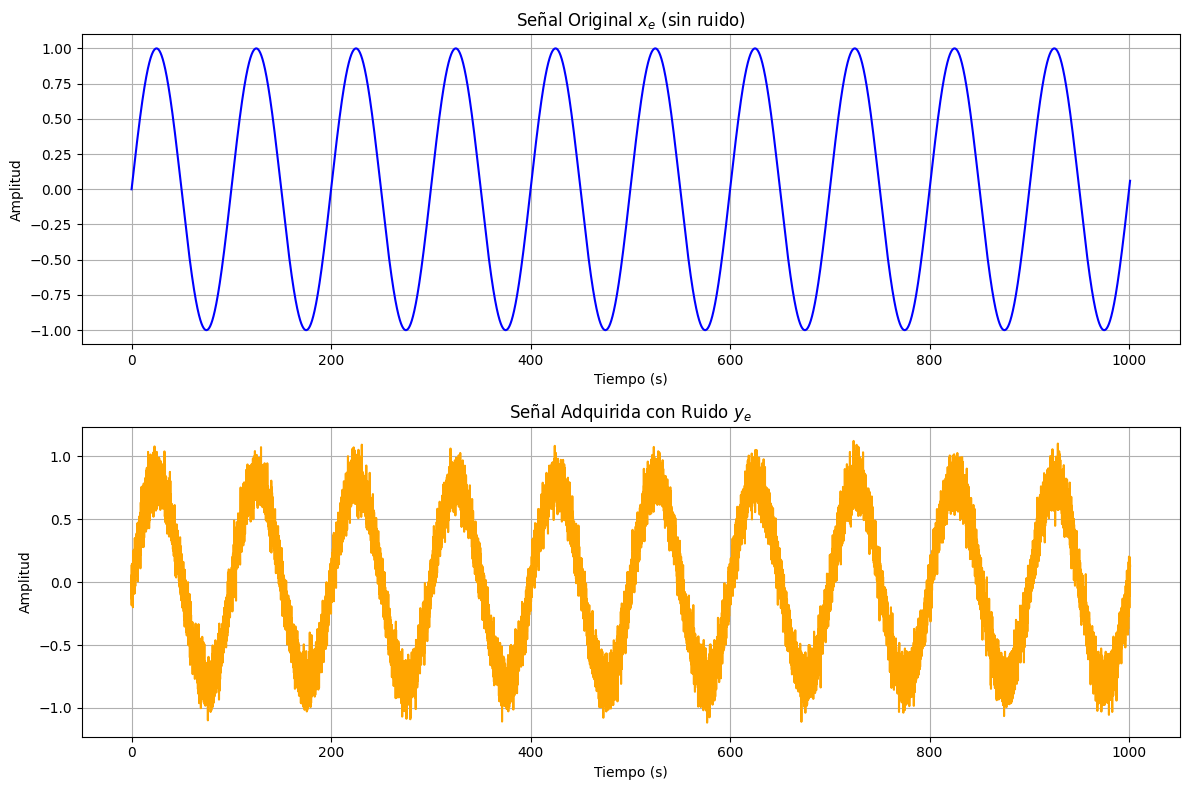

In [ ]:
F0 = 0.01  # frecuencia fundamental
Fs = 25  # frecuencia de muestreo
alfa = 0.8  # atenuación
D = 15  # retardo inducido en la adquisición
var = 0.01  # varianza del ruido
media = 0  # media del ruido

# Generación de datos
n = np.arange(0, 1001, 1/Fs)  # tiempo
x_e = np.sin(2 * np.pi * F0 * n)  # señal original sin desfase
w = np.random.normal(media, np.sqrt(var), len(n))  # ruido gaussiano
y_e = alfa * np.sin(2 * np.pi * F0 * (n - D/Fs)) + w  # señal adquirida con ruido y desfase
# Listas de señales y títulos para el bucle
signals = [x_e, y_e]
titles = ["Señal Original $x_e$ (sin ruido)", "Señal Adquirida con Ruido $y_e$"]
colors = ['blue', 'orange']

# Gráfica de las señales en subplots usando un bucle for
plt.figure(figsize=(12, 8))
for i in range(2):
    plt.subplot(2, 1, i + 1)
    plt.plot(n, signals[i], color=colors[i])
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Amplitud")
    plt.title(titles[i])
    plt.grid()

plt.tight_layout()
plt.show()

#**4.2 Filtros Fir e IIR**

##**Filtro FIR**

Diseñe un filtro FIR pasa bajas para la señal 𝑦𝑒(𝑛), con una frecuencia de corte
de 1.25 muestras/s y orden 30

¿Qué cambios hay en los argumentos de la función para implementar un filtro
pasa banda y pasa altas? Pruebe con una frecuencia de corte adicional de 7.5
muestras/s.

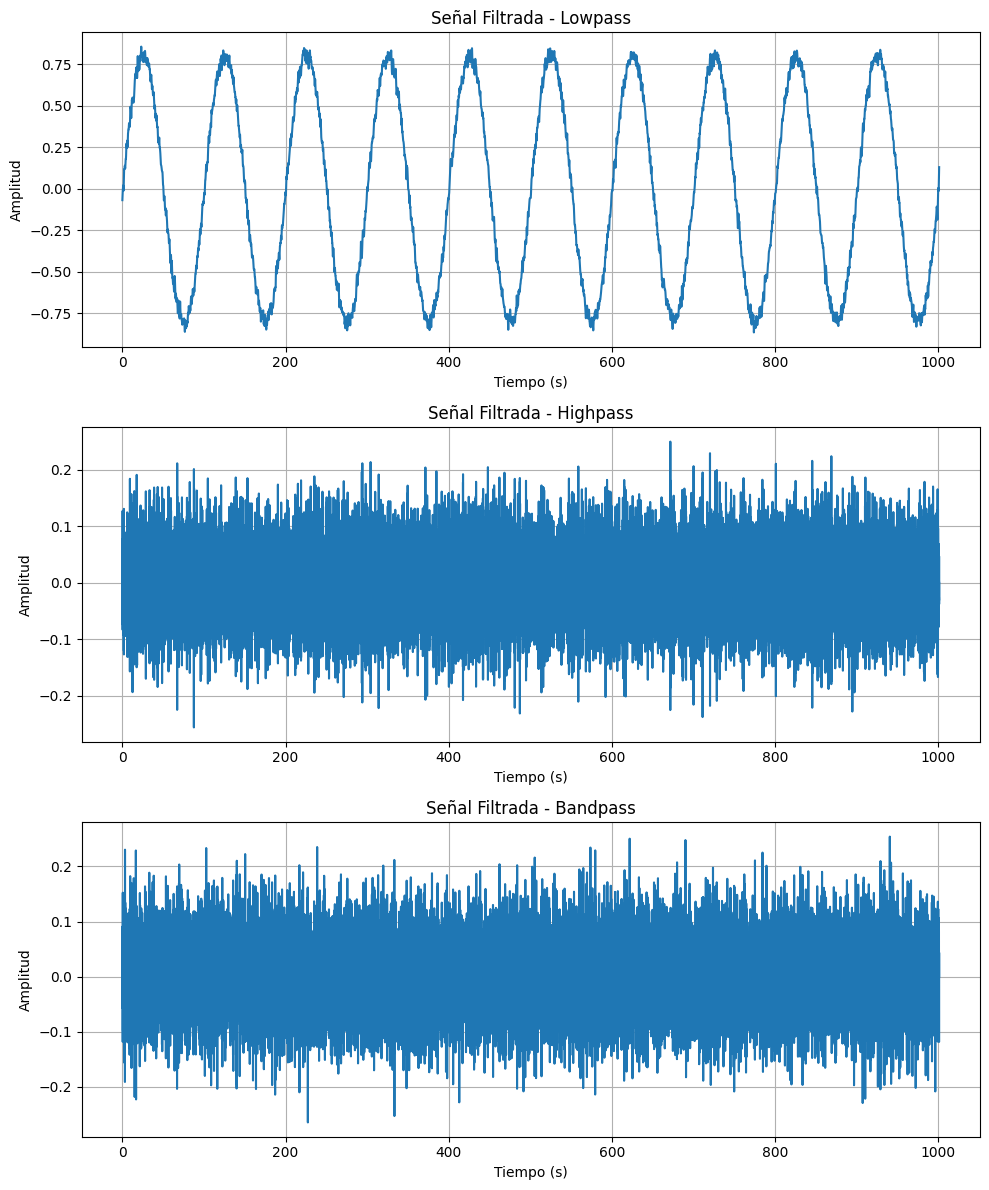

In [ ]:
# Parámetros para FIR
orderFIR = 30  # orden del filtro
nyquist = Fs / 2  # frecuencia de Nyquist
# Frecuencias de corte normalizadas
wn_lowPass = 1.25 / nyquist
wn_highPass = 7.25 / nyquist

# Definición de los filtros FIR y sus configuraciones
filtersFIR= {
    'Lowpass': signal.firwin(orderFIR + 1, wn_lowPass, pass_zero='lowpass', window='hamming'),
    'Highpass': signal.firwin(orderFIR + 1, wn_highPass, pass_zero='highpass', window='hamming'),
    'Bandpass': signal.firwin(orderFIR + 1, [wn_lowPass, wn_highPass], pass_zero='bandpass', window='hamming')
}

# Aplicación de los filtros y visualización de las señales filtradas
plt.figure(figsize=(10, 12))
for i, (filter_name, filter_coeff) in enumerate(filtersFIR.items()):
    y_filtered = signal.filtfilt(b=filter_coeff, a=1, x=y_e)  # aplicación del filtro
    plt.subplot(3, 1, i + 1)
    plt.plot(n, y_filtered)
    plt.title(f'Señal Filtrada - {filter_name}')
    plt.ylabel("Amplitud")
    plt.xlabel("Tiempo (s)")
    plt.grid()

plt.tight_layout()

##**Filtro IIR**

Diseñe un filtro IIR en las mismas condiciones de los puntos anteriores. Compare
cambios

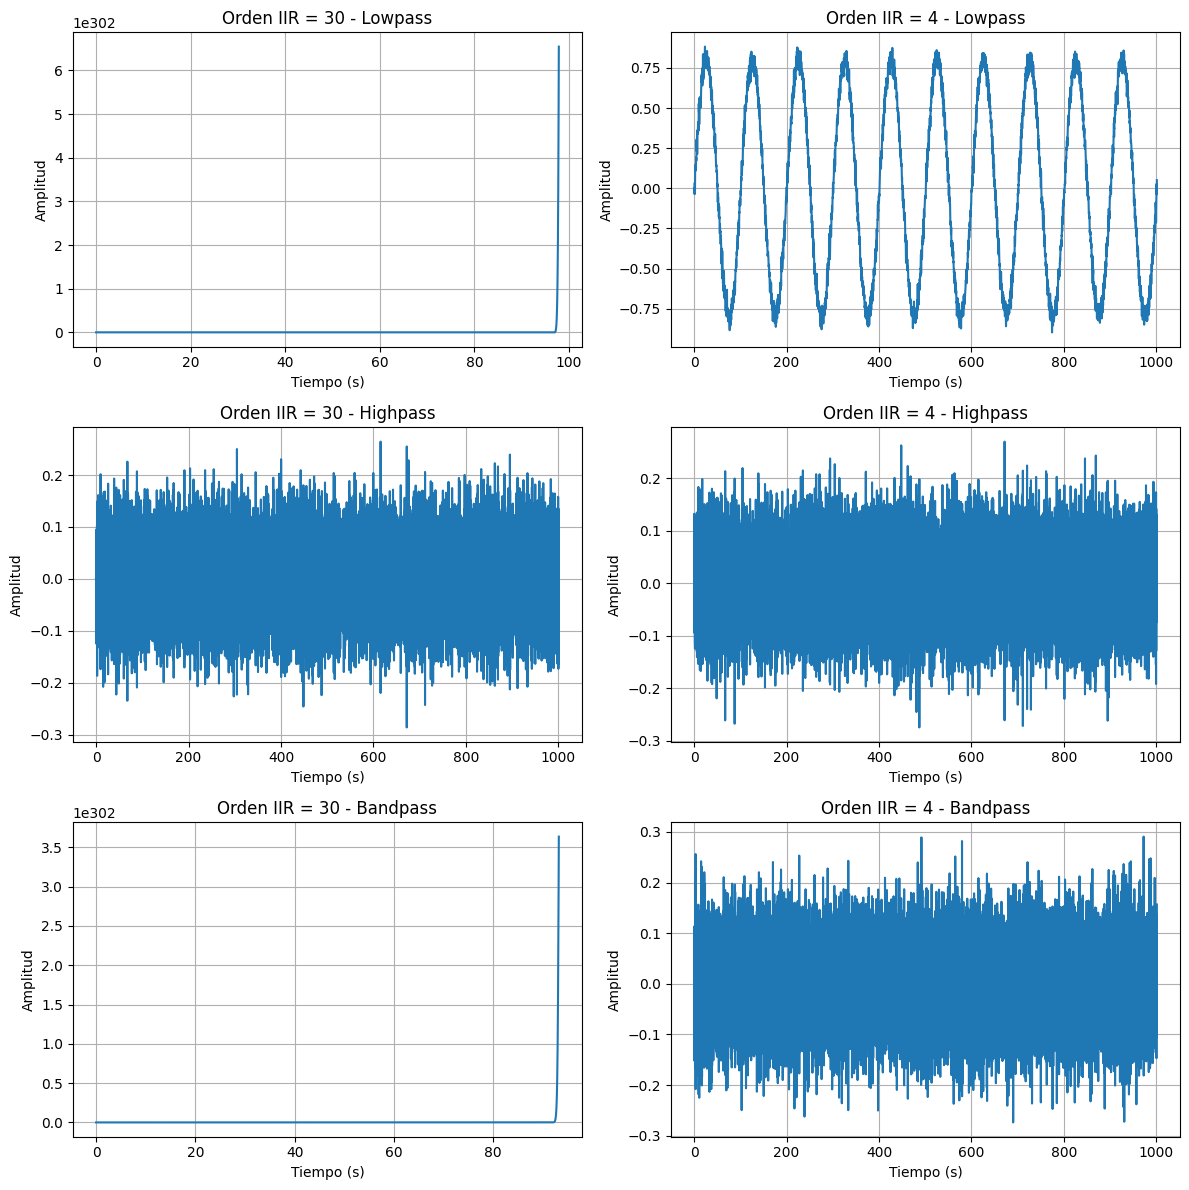

In [ ]:
orderFIR = 30
orders = [orderFIR, 4]
titles = [f'Orden IIR = {orderFIR}', 'Orden IIR = 4']

# Visualización de los filtros con dos órdenes diferentes en columnas separadas
plt.figure(figsize=(12, 12))

for j, orderIIR in enumerate(orders):
    # Definición de los filtros IIR con el orden correspondiente
    filtersIIR = {
        'Lowpass': signal.iirfilter(orderIIR, wn_lowPass, btype='low', ftype='butter'),
        'Highpass': signal.iirfilter(orderIIR, wn_highPass, btype='high', ftype='butter'),
        'Bandpass': signal.iirfilter(orderIIR, [wn_lowPass, wn_highPass], btype='band', ftype='butter')
    }

    # Subplots de cada filtro en columnas
    for i, (filter_name, (b, a)) in enumerate(filtersIIR.items()):
        y_filtered = signal.lfilter(b, a, y_e)  # Aplicación del filtro
        plt.subplot(3, 2, i * 2 + j + 1)
        plt.plot(n, y_filtered)
        plt.title(f'{titles[j]} - {filter_name}')
        plt.ylabel("Amplitud")
        plt.xlabel("Tiempo (s)")
        plt.grid()

plt.tight_layout()
plt.show()

##**GRAFICAS FIR**

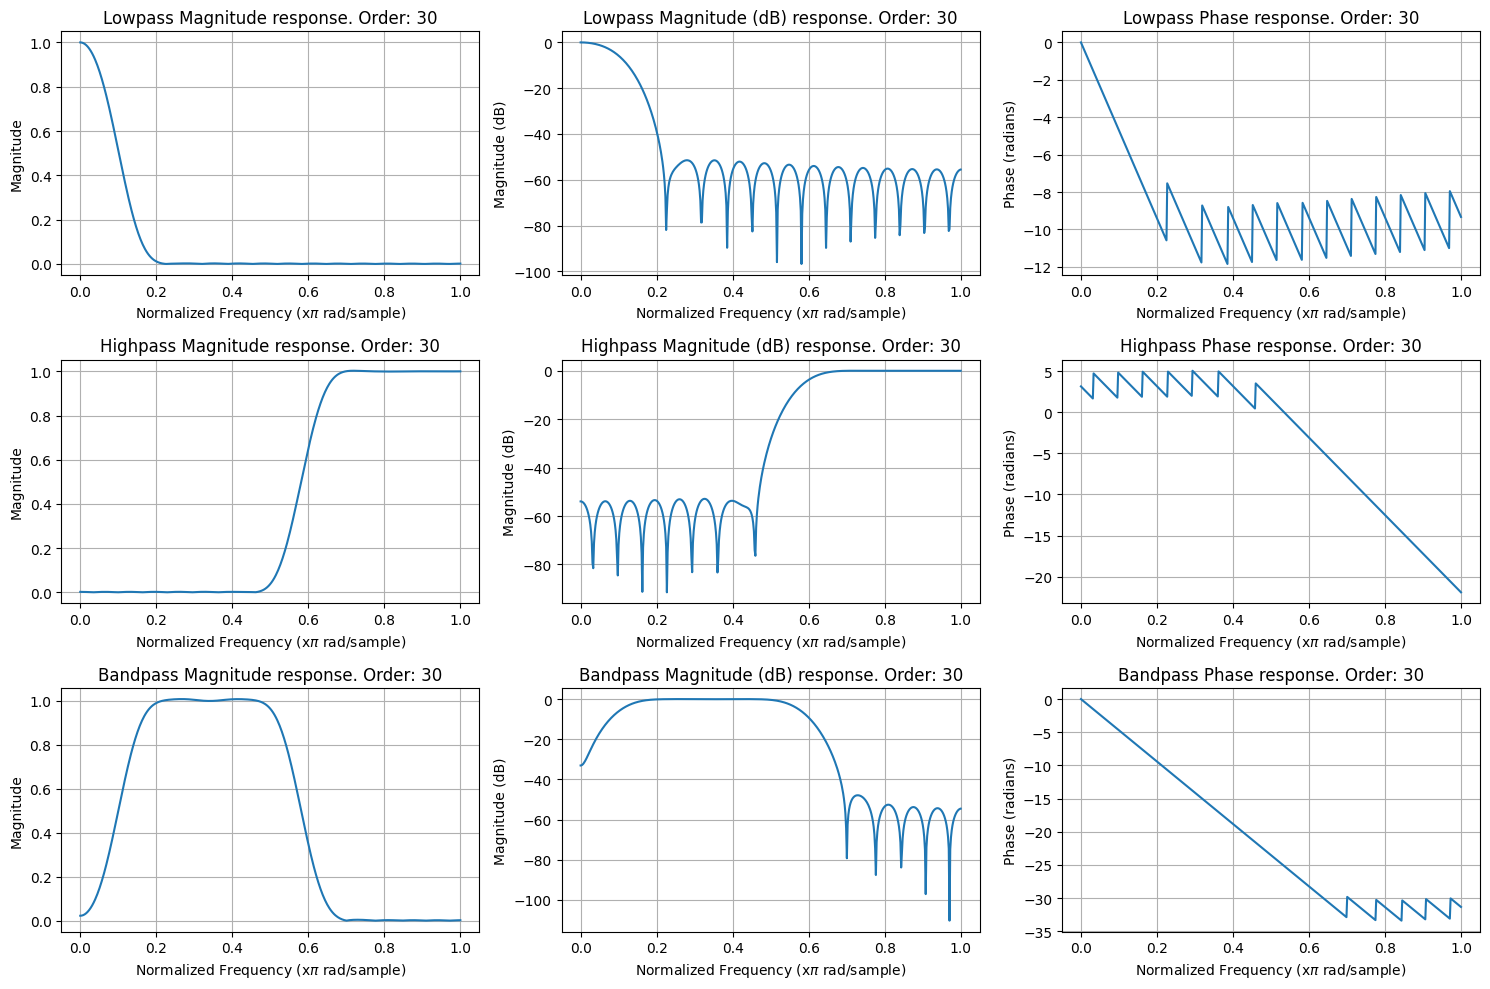

In [ ]:

def mfreqz(filters, order, nyq_rate=1):
    """
    Plot the impulse response of multiple filters in the frequency domain in a 3x3 subplot.

    Parameters:
        filters: dictionary with filter types as keys and numerator coefficients as values.
        order: order of the filters.
        nyq_rate: Nyquist frequency.
    """

    # Crear la figura
    plt.figure(figsize=(15, 10))

    # Iterar a través de cada tipo de filtro
    filter_types = list(filters.keys())
    for i, filter_type in enumerate(filter_types):
        b = filters[filter_type]
        a = 1  # Denominador del filtro FIR

        # Calcular respuesta en frecuencia
        w, h = signal.freqz(b, a)
        h_dB = 20 * np.log10(abs(h))
        h_Phase = np.unwrap(np.angle(h))

        # Definir las respuestas y títulos
        responses = [abs(h), h_dB, h_Phase]
        titles = [f'{filter_type} Magnitude response. Order: {order}',
                  f'{filter_type} Magnitude (dB) response. Order: {order}',
                  f'{filter_type} Phase response. Order: {order}']
        ylabels = ['Magnitude', 'Magnitude (dB)', 'Phase (radians)']

        # Crear subplots para las tres respuestas
        for j, response in enumerate(responses):
            plt.subplot(3, 3, i * 3 + j + 1)
            plt.plot((w / max(w)) * nyq_rate, response)
            plt.title(titles[j])
            plt.ylabel(ylabels[j])
            plt.xlabel(r'Normalized Frequency (x$\pi$ rad/sample)')
            plt.grid(True)

    # Ajustar los espacios y mostrar
    plt.tight_layout()
    plt.show()
mfreqz(filters=filtersFIR, order=orderFIR)

##**GRAFICAS IIR**

<ipython-input-51-526b8135b9f0>:21: RuntimeWarning: divide by zero encountered in log10
  h_dB = 20 * np.log10(abs(h))


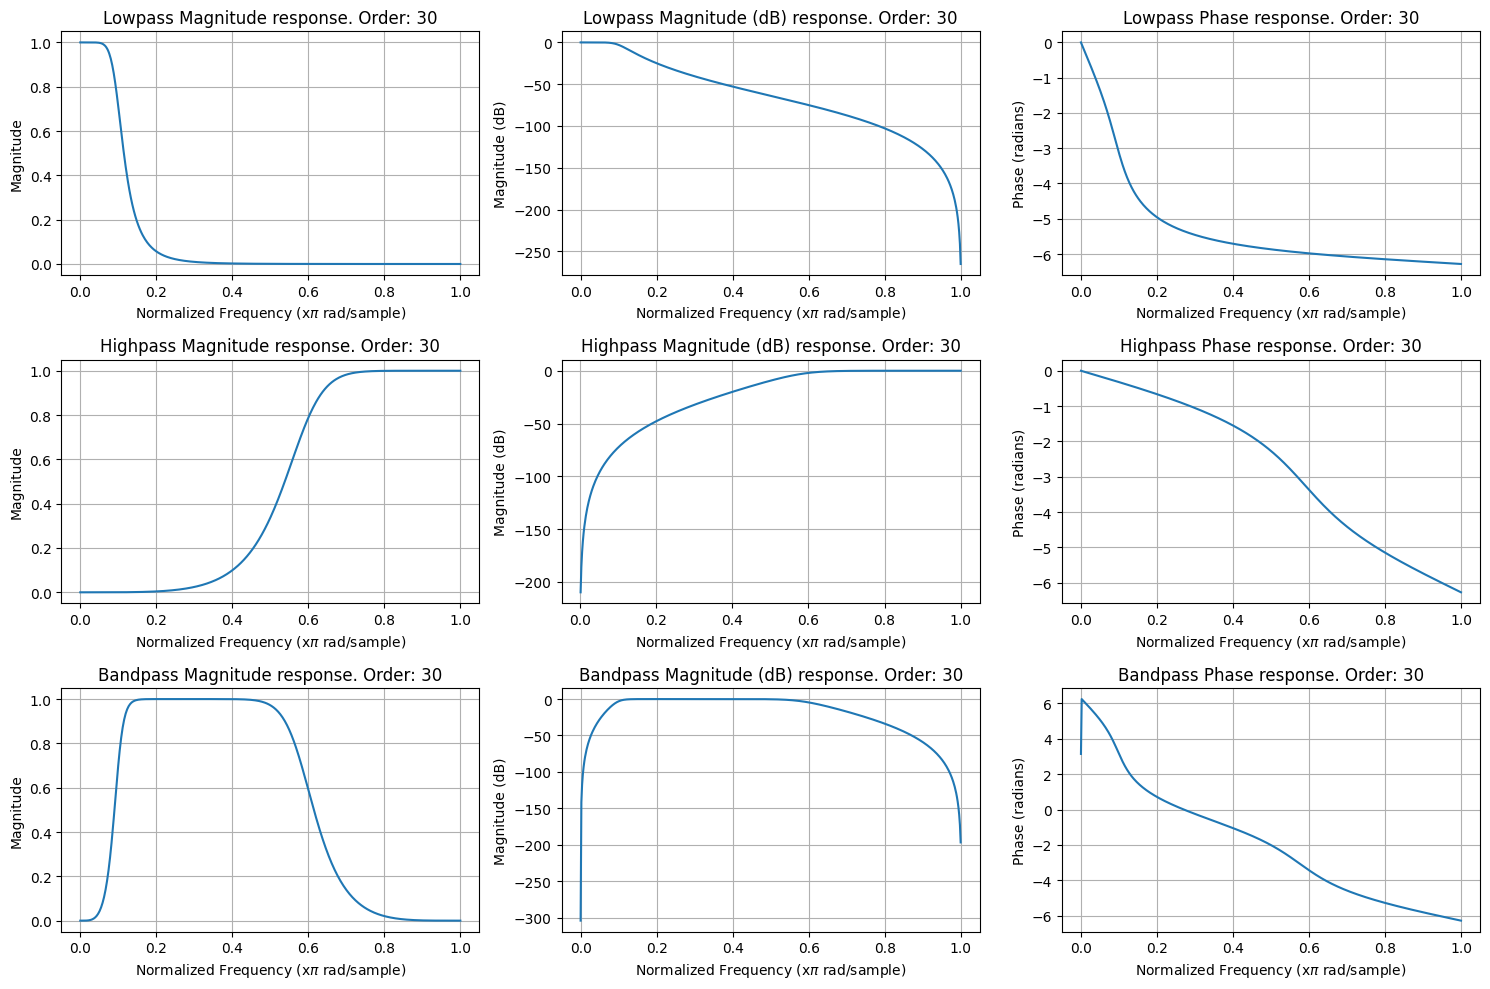

In [ ]:
def mfreqz2(filters, order, nyq_rate=1):
    """
    Plot the impulse response of multiple IIR filters in the frequency domain in a 3x3 subplot.

    Parameters:
        filters: dictionary with filter types as keys and tuples (b, a) of coefficients as values.
        order: order of the filters (assuming the same for all).
        nyq_rate: Nyquist frequency.
    """

    # Crear la figura con disposición 3x3
    plt.figure(figsize=(15, 10))

    # Iterar sobre cada filtro y sus características
    filter_types = list(filters.keys())
    for i, filter_type in enumerate(filter_types):
        b, a = filters[filter_type]

        # Calcular respuesta en frecuencia
        w, h = signal.freqz(b, a)
        h_dB = 20 * np.log10(abs(h))
        h_Phase = np.unwrap(np.angle(h))

        # Respuestas y títulos
        responses = [abs(h), h_dB, h_Phase]
        titles = [f'{filter_type} Magnitude response. Order: {order}',
                  f'{filter_type} Magnitude (dB) response. Order: {order}',
                  f'{filter_type} Phase response. Order: {order}']
        ylabels = ['Magnitude', 'Magnitude (dB)', 'Phase (radians)']

        # Subplots para cada respuesta
        for j, response in enumerate(responses):
            plt.subplot(3, 3, i * 3 + j + 1)
            plt.plot((w / max(w)) * nyq_rate, response)
            plt.title(titles[j])
            plt.ylabel(ylabels[j])
            plt.xlabel(r'Normalized Frequency (x$\pi$ rad/sample)')
            plt.grid(True)

    # Ajustar espacios entre subplots y mostrar
    plt.tight_layout()
    plt.show()
mfreqz2(filters=filtersIIR, order=orders[0])

<ipython-input-51-526b8135b9f0>:21: RuntimeWarning: divide by zero encountered in log10
  h_dB = 20 * np.log10(abs(h))


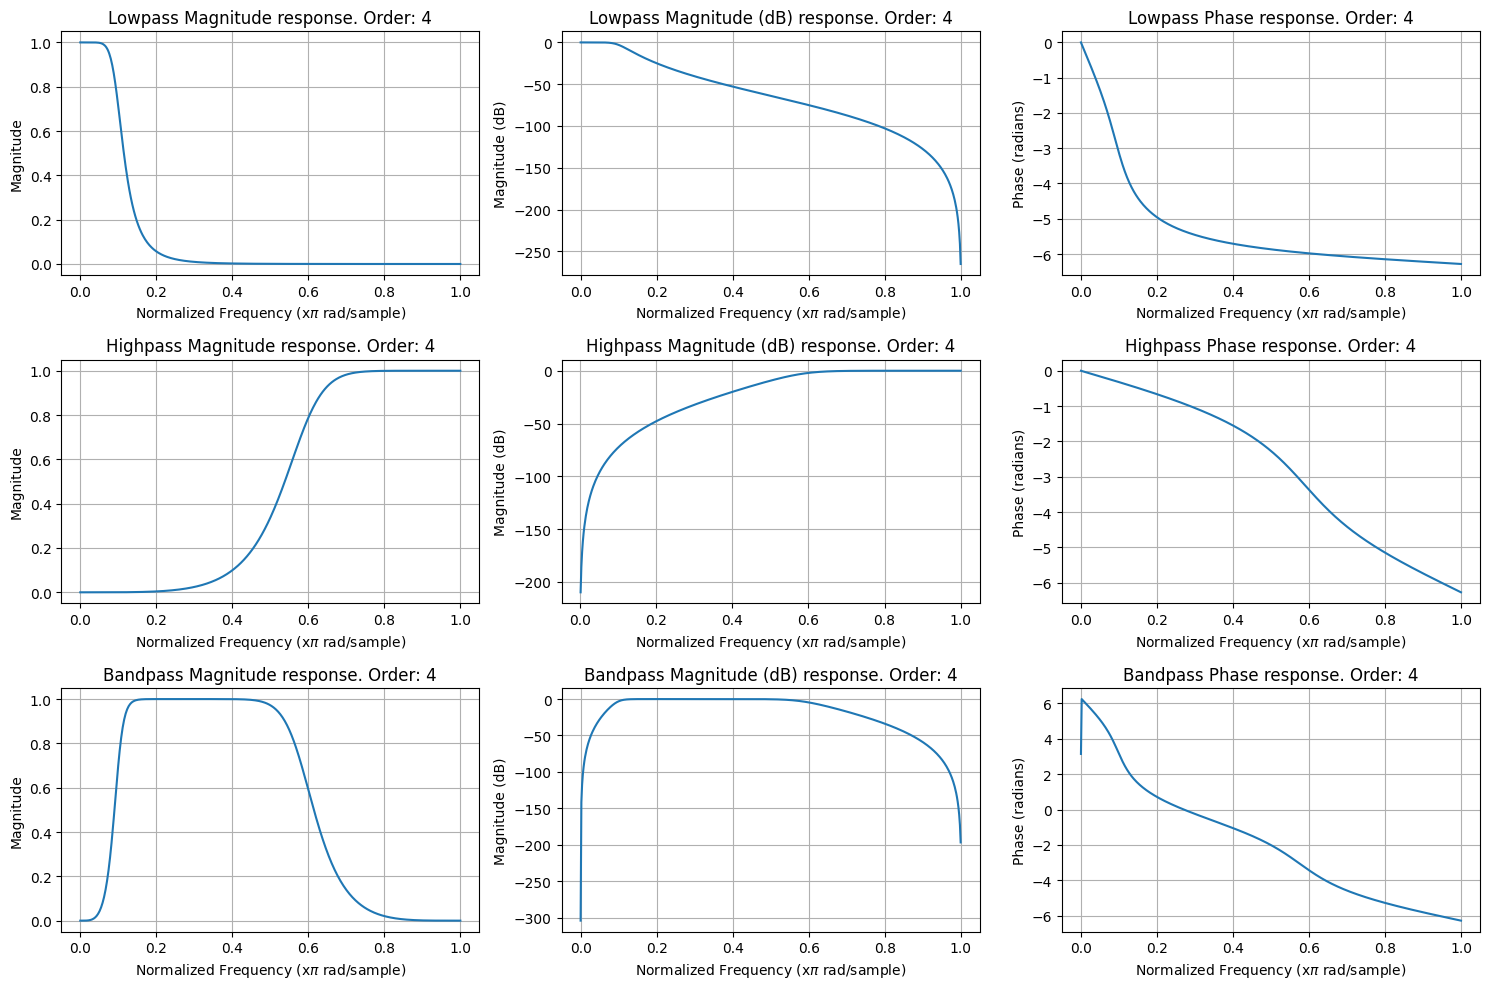

In [ ]:
mfreqz2(filters=filtersIIR, order=orders[1])

#**4.3 Teoria**

Pruebe dichos comandos utilizando la información entregada por el filtro pasa
bajas FIR implementado anteriormente y la señal 𝑦𝑒(𝑛) ¿Por qué se utiliza sólo el
numerador? ¿A qué hace referencia el numerador? ¿Evidencia cambios en el uso
de las funciones de filtrado? ¿Cómo se puede explicar la falta de coincidencia?
¿Es adecuado el orden del filtro usado? Analice.

**Respuestas**

- Los filtros FIR (Filtro de Respuesta Finita al Impulso) son filtros que dependen únicamente de los valores presentes y pasados de la entrada, sin retroalimentación de la salida. Esto significa que el denominador en la función de transferencia de un filtro FIR siempre es 1, ya que no hay términos que incluyan la salida en tiempos anteriores[1]. Como resultado, la estructura del filtro FIR es inherentemente estable y presenta una respuesta finita al impulso.

- Al aplicar el filtro pasa bajas FIR, se observa que este es el único tipo de filtro que permite el paso de la frecuencia fundamental de la señal, mientras atenúa las frecuencias más altas. Esto ocurre porque el filtro pasa bajas tiene una frecuencia de corte adecuada que conserva la frecuencia fundamental dentro de su rango. Los filtros pasa altas y de bandas no logran el mismo efecto, ya que, por su diseño, tienden a atenuar o eliminar la frecuencia fundamental de la señal, lo que impide su correcto funcionamiento en este contexto.

- La falta de coincidencia es la discrepancia entre la respuesta real del filtro y la respuesta ideal deseada, y generalmente se debe a limitaciones en el diseño, como el orden del filtro o la precisión en la implementación de sus coeficientes[1]. En los filtros FIR, esta discrepancia suele ser más notable en aquellos de orden bajo, ya que el filtro no cuenta con suficientes coeficientes para ajustarse a la respuesta ideal. Con un orden bajo, el filtro puede no eliminar adecuadamente las frecuencias no deseadas e incluso llegar a distorsionar la señal original en ciertas bandas.

- Aunque el filtro pasa bajas conserva algo de ruido, esto puede deberse a que la frecuencia de corte no es lo suficientemente baja como para atenuar completamente las frecuencias no deseadas o al hecho de que el filtro tiene un orden relativamente bajo. A pesar de esto, el filtro FIR de paso bajo cumple su función principal de filtrar la señal, permitiendo el paso de la componente fundamental. Para mejorar la calidad del filtrado y reducir el ruido, podría considerarse aumentar el orden del filtro o ajustar la frecuencia de corte según las necesidades de la aplicación.


Pruebe dichos comandos utilizando la información entregada por el filtro pasa
bajas IIR implementado anteriormente y la señal 𝑦𝑒(𝑛) ¿Por qué se utiliza el
numerador y denominador? ¿Es necesario cambiar el orden del filtro? En tal
caso hágalo y analice.

**Respuestas**

- En el caso del filtro IIR (Filtro de Respuesta Infinita al Impulso), es necesario incluir un denominador en la función de transferencia, ya que este filtro utiliza retroalimentación; es decir, depende de valores pasados de la salida para poder funcionar. Esto hace que el filtro IIR tenga una estructura de realimentación y una respuesta al impulso de duración infinita, a diferencia de los filtros FIR que solo dependen de los valores de entrada y tienen un denominador igual a 1[2].

- En este caso, el orden del filtro inicial era demasiado alto, lo que provocó que el filtro no funcionara correctamente con la señal. Para mejorar su desempeño, fue necesario reducir el orden del filtro, ya que un orden demasiado alto puede causar inestabilidad o respuestas no deseadas[3]. En el punto 4.2, se utilizó un filtro de segundo orden con tamaño 4, un orden mucho menor que, sin embargo, permitió que el filtro funcionara adecuadamente. En este experimento, el filtro pasa bajas fue el único que funcionó correctamente, debido a que su frecuencia de corte estaba ajustada para permitir el paso de la frecuencia fundamental de la señal, mientras que los filtros pasa altas y de banda no lograron filtrar adecuadamente debido a su respuesta en frecuencia no alineada con la frecuencia principal de la señal[3].

#**4.4 Aplicación**

Cargue la señal señal_filtros.txt adquirida a una frecuencia de muestreo de 500 Hz.
Extraiga y trabaje con el canal 1 de la señal.

Realice un análisis frecuencial con la función que permite calcular el
periodograma de Welch de una señal ¿Hay presencia de ruido eléctrico? Analice.
• Diseñe un filtro FIR que permita eliminar el ruido de la señal. Grafique. Luego
verifique nuevamente el comportamiento en frecuencia (periodograma de Welch
de la señal filtrada) ¿Hay cambios? Analice.
• Grafique un segmento de las señales antes y después de filtrar, analice los
cambios

In [ ]:
archivo_path = '/content/drive/MyDrive/P6/senal_filtros.txt'
senal = pd.read_csv(archivo_path, sep='\t', header=None)
senal_canal1=senal[1]



In [ ]:
señal_total = senal_canal1  # Convierte a array de numpy si es necesario
T_muestreo = 1 / 500        # Frecuencia de muestreo en segundos (500 Hz)
N = len(señal_total)        # Número total de muestras
tiempo = np.arange(N) * T_muestreo
  # Vector de tiempo en segundos


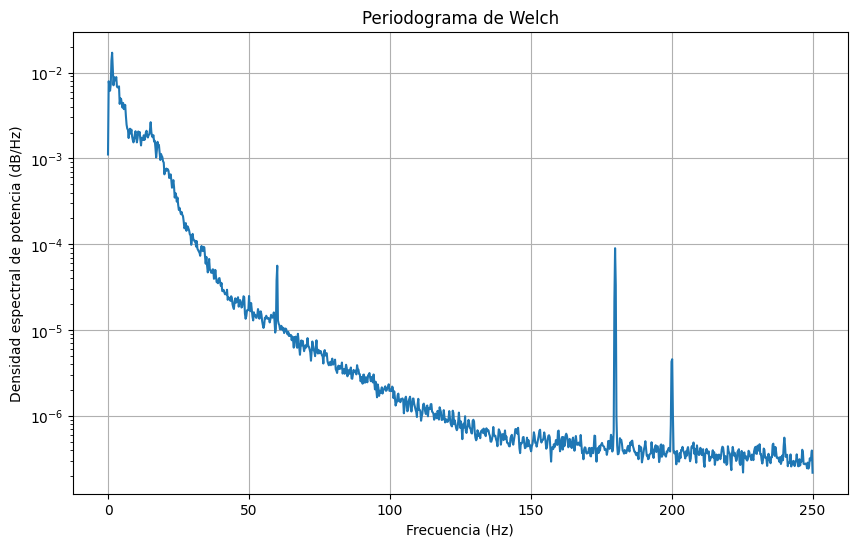

In [ ]:
fs = 500  # Frecuencia de muestreo (Hz)
frequencies, psd = signal.welch(señal_total, fs, window='hann', nperseg=2048, noverlap=1024)
# Graficar el Periodograma
plt.figure(figsize=(10, 6))
plt.semilogy(frequencies, psd)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia (dB/Hz)')
plt.title('Periodograma de Welch')
plt.grid(True)
plt.show()

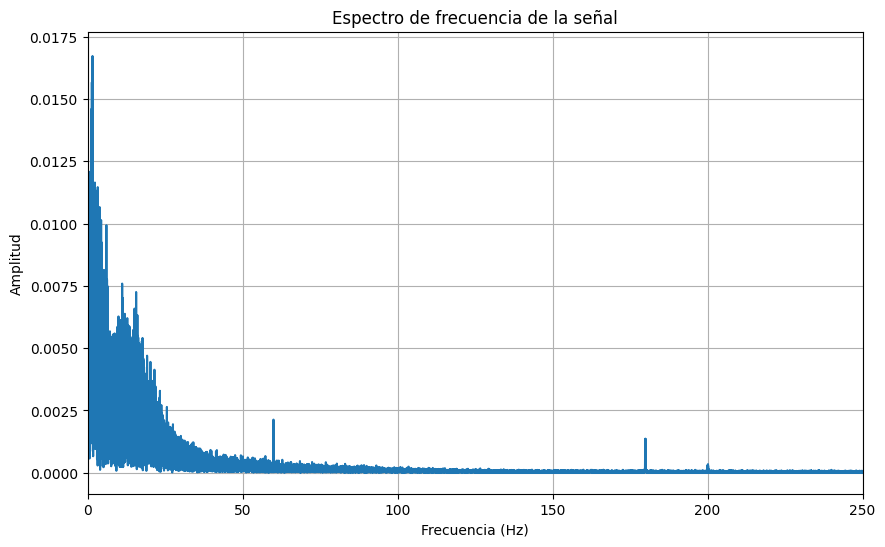

In [ ]:

señal_total = senal_canal1
T_muestreo = 1 / 500  # Frecuencia de muestreo (500 Hz)

# Restar la media para eliminar el componente DC
señal_total = señal_total - np.mean(señal_total)

# Transformada de Fourier
X = np.fft.fft(señal_total)
N = len(señal_total)
f = np.fft.fftfreq(N, T_muestreo)

# Gráfica del espectro de frecuencia sin el componente DC
plt.figure(figsize=(10, 6))
plt.plot(f[:N // 2], np.abs(X[:N // 2]) / N)
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.title("Espectro de frecuencia de la señal")
plt.grid(True)
plt.xlim(0, 250)  # Muestra hasta 250 Hz
plt.show()

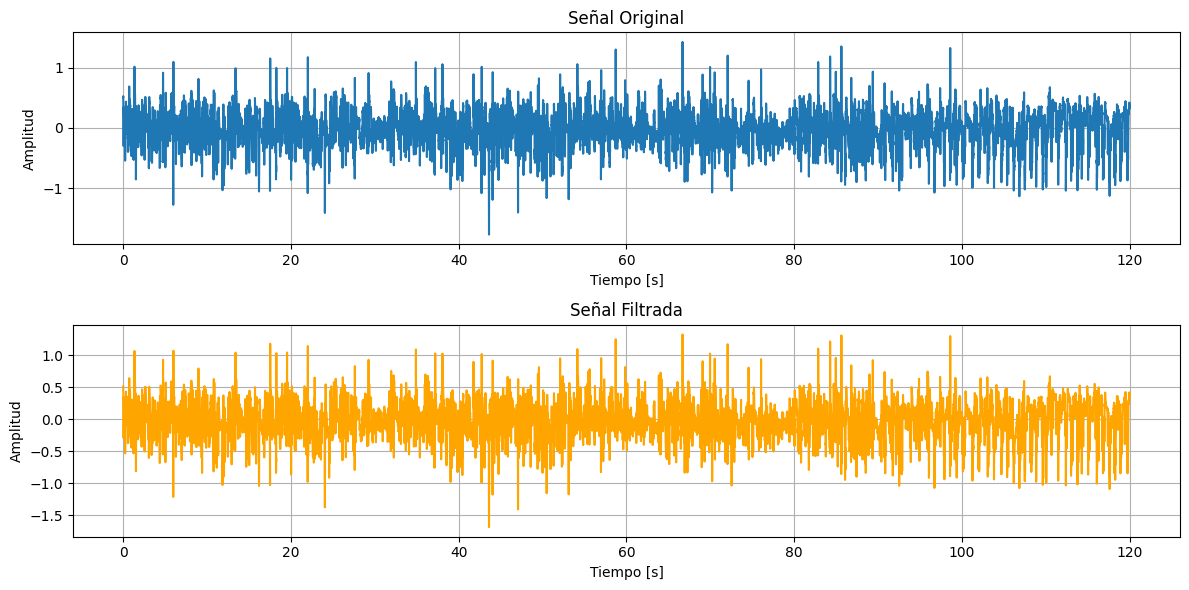

In [ ]:

fc2 = 70  # Frecuencia de corte superior
fe = 60   # Frecuencia a eliminar
fs = 500  # Frecuencia de muestreo (ajusta según tu caso)
# Normalización de frecuencias
f_c2_norm = fc2 / (fs / 2)
f_e_lower_norm = (fe - 1) / (fs / 2)  # Frecuencia de corte inferior (ajusta el rango según tus necesidades)
f_e_upper_norm = (fe + 1) / (fs / 2)  # Frecuencia de corte superior (ajusta el rango según tus necesidades)
f2=1/(fs/2)
# Calcular el orden del filtro FIR
orden = int(np.floor(5.5 / f2))  # Convierte a entero
if orden % 2 == 0:
    orden += 1

# Coeficientes del filtro FIR
bcof = signal.firwin(orden, f_c2_norm, pass_zero='lowpass', window='blackman')
y_filtered = signal.filtfilt(bcof, a=1, x=señal_total)
bcof_bandstop = signal.firwin(orden, [f_e_lower_norm, f_e_upper_norm], pass_zero='bandstop', window='blackman')
y_filtered = signal.filtfilt(bcof_bandstop, a=1, x=y_filtered)

# Graficar resultados
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(tiempo, señal_total, label='Señal Original')
plt.title('Señal Original')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(tiempo, y_filtered, label='Señal Filtrada', color='orange')
plt.title('Señal Filtrada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid()

plt.tight_layout()
plt.show()


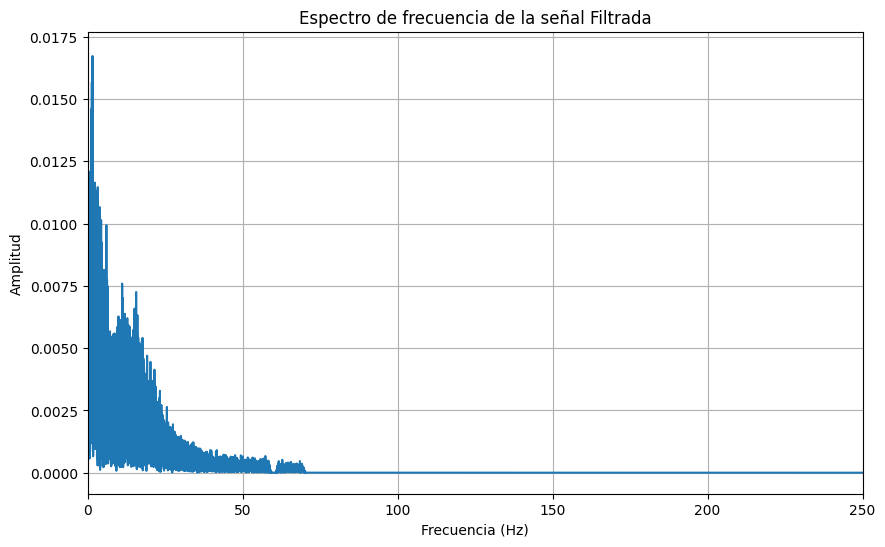

In [ ]:


# Restar la media para eliminar el componente DC
señal_total = señal_total - np.mean(señal_total)

# Transformada de Fourier
X = np.fft.fft(y_filtered)
N = len(señal_total)
f = np.fft.fftfreq(N, T_muestreo)

# Gráfica del espectro de frecuencia sin el componente DC
plt.figure(figsize=(10, 6))
plt.plot(f[:N // 2], np.abs(X[:N // 2]) / N)
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.title("Espectro de frecuencia de la señal Filtrada")
plt.grid(True)
plt.xlim(0, 250)  # Muestra hasta 250 Hz
plt.show()

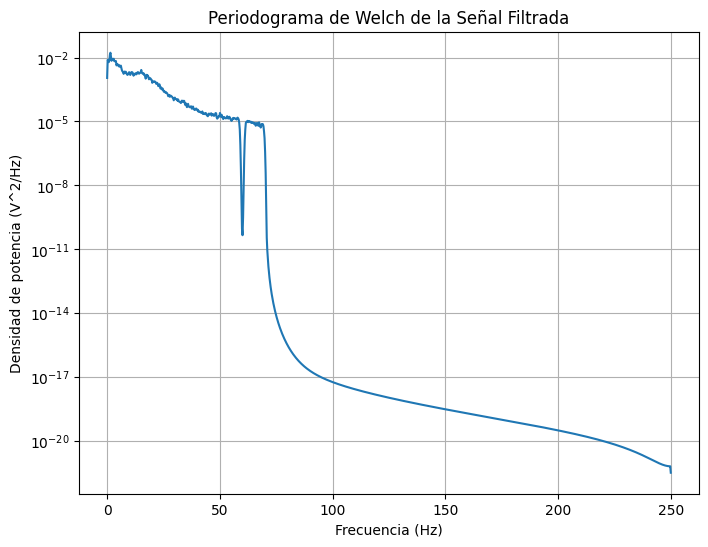

In [ ]:
fs = 500  # Frecuencia de muestreo (Hz)
frecuencias, Pxx = welch(y_filtered, fs, window='hann', nperseg=2048, noverlap=1024)
# Graficar el periodograma de Welch
plt.figure(figsize=(8, 6))
plt.semilogy(frecuencias, Pxx)
plt.title('Periodograma de Welch de la Señal Filtrada')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad de potencia (V^2/Hz)')
plt.grid()

#**Conclusiones**

- Los filtros digitales lineales, como los filtros IIR y FIR, difieren significativamente en cuanto a la necesidad de orden de datos. Los filtros IIR, debido a su estructura de retroalimentación, requieren un orden menor que los FIR para lograr una respuesta de frecuencia similar, lo que los hace eficientes en aplicaciones donde el uso de coeficientes debe ser mínimo.

- La implementación de filtros FIR suele ser más estable y fácil de diseñar, ya que no tienen retroalimentación y su denominador es siempre 1. Sin embargo, al ser filtros de respuesta finita, requieren un orden mayor para alcanzar la misma precisión en la respuesta de frecuencia que un filtro IIR. Esto puede incrementar la complejidad computacional, especialmente en aplicaciones de filtrado preciso.

- En el caso del filtrado de una señal utilizando un filtro pasa bajas, se observó que ambos tipos de filtros (FIR e IIR) pueden funcionar adecuadamente. Sin embargo, los filtros IIR demostraron ser más eficientes en la eliminación de ruido con un orden bajo, mientras que el filtro FIR requería un orden mayor para lograr el mismo efecto. Además, ajustar adecuadamente la frecuencia de corte fue fundamental para que el filtro pasa bajas permitiera el paso de la frecuencia fundamental, mientras que los filtros pasa altas y de banda no lograron captar esta componente debido a su respuesta en frecuencia.

#**Referencias**

[1] Second Edition. (s/f). Digital Signal Processing. Archive.org. Recuperado el 1 de noviembre de 2024, de https://ia801301.us.archive.org/23/items/GuideToDigitalSignalProcessing/Guide%20To%20Digital%20Signal%20Processing.pdf

[2] (S/f-a). Edu.vn. Recuperado el 1 de noviembre de 2024, de http://tailieudientu.lrc.tnu.edu.vn/Upload/Collection/brief/brief_49522_54410_TN201500362.pdf

[3] (S/f-b). Umontreal.ca. Recuperado el 1 de noviembre de 2024, de https://www.iro.umontreal.ca/~mignotte/IFT3205/Documents/UnderstandingDigitalSignalProcessing.pdf